In [11]:
#packages
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

df = pd.read_excel("C:/Users/HP/Downloads/M4_Low_Birth_Weight_Data.xlsx", "LOWBWT")

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


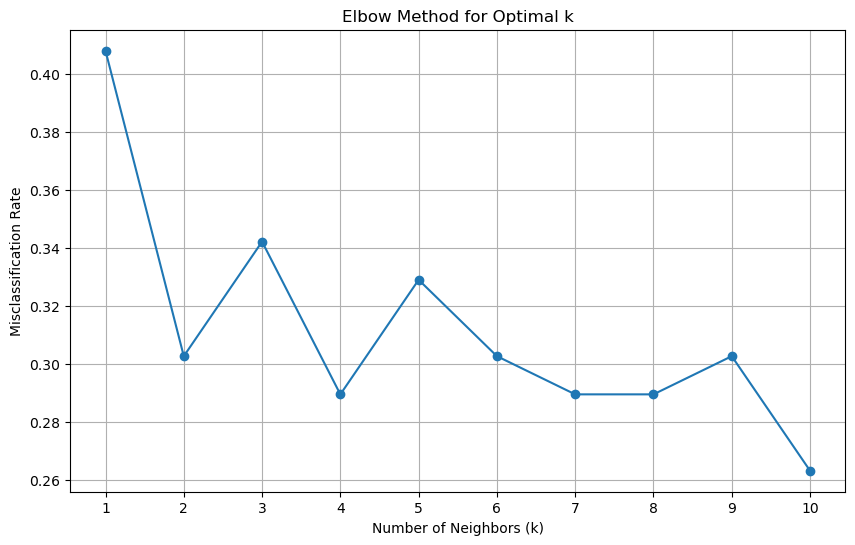

(10, 0.26315789473684215)

In [13]:
# Define features and target variable
X = df.drop(columns=['ID', 'LOW'])
y = df['LOW']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (60% training, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Evaluate k-NN for k values from 1 to 10 using the elbow method
misclassification_rates = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    misclassification_rate = 1 - accuracy_score(y_test, y_pred)
    misclassification_rates.append(misclassification_rate)

# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), misclassification_rates, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclassification Rate')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Best k based on the elbow method
best_k = np.argmin(misclassification_rates) + 1
best_k, misclassification_rates[best_k - 1]

In [15]:
# Best k based on the elbow method
best_k = np.argmin(misclassification_rates) + 1
best_k, misclassification_rates[best_k - 1]

(10, 0.26315789473684215)

In [17]:
# Build and evaluate the final k-NN model with k=8
knn_best = KNeighborsClassifier(n_neighbors=8)
knn_best.fit(X_train, y_train)

# Predict on the test set
y_test_pred = knn_best.predict(X_test)

# Calculate the misclassification rate
misclassification_rate_best_k = 1 - accuracy_score(y_test, y_test_pred)

misclassification_rate_best_k


0.2894736842105263

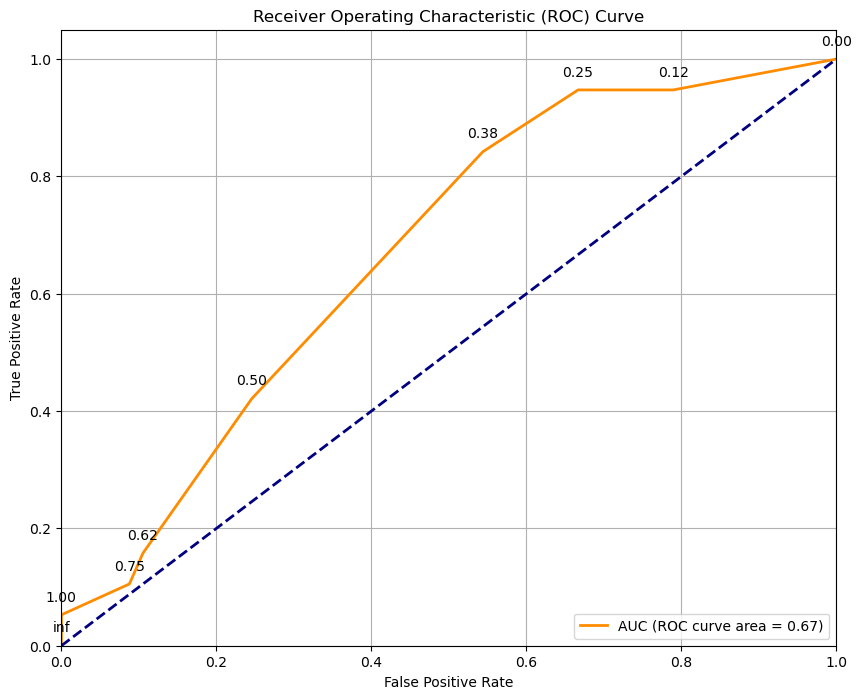

In [19]:
# Get the probability scores for the positive class
y_test_prob = knn_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC (ROC curve area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Indicate threshold values on the curve
for i, thr in enumerate(thresholds):
    plt.annotate(f'{thr:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [21]:
auc = roc_auc_score(y_test, y_test_prob)
print(f"AUC: {auc:.2f}")

AUC: 0.67
